In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from pandas_datareader.data import DataReader

In [3]:
from datetime import datetime
from __future__ import division

In [4]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [5]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [6]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [7]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-06,208.839996,203.500000,204.289993,208.479996,32443100.0,205.786469
2019-05-07,207.419998,200.830002,205.880005,202.860001,38763700.0,200.239075
2019-05-08,205.339996,201.750000,201.899994,202.899994,26339500.0,200.278534
2019-05-09,201.679993,196.660004,200.399994,200.720001,34908600.0,198.126709
2019-05-10,198.850006,192.770004,197.419998,197.179993,41208700.0,195.381973


In [8]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,248.355512,242.740670,245.190629,245.783307,3.350756e+07,244.835110
std,43.489273,42.257678,42.712466,43.094811,1.718843e+07,43.621342
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.719727
25%,207.200001,203.549999,205.594997,205.670002,2.186125e+07,204.471893
50%,248.205002,239.375000,243.834999,243.434998,2.845690e+07,242.242950
75%,282.920006,277.540001,279.742493,279.979988,3.803428e+07,279.317085
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,327.200012


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-05-06 to 2020-05-06
Data columns (total 6 columns):
High         254 non-null float64
Low          254 non-null float64
Open         254 non-null float64
Close        254 non-null float64
Volume       254 non-null float64
Adj Close    254 non-null float64
dtypes: float64(6)
memory usage: 13.9 KB


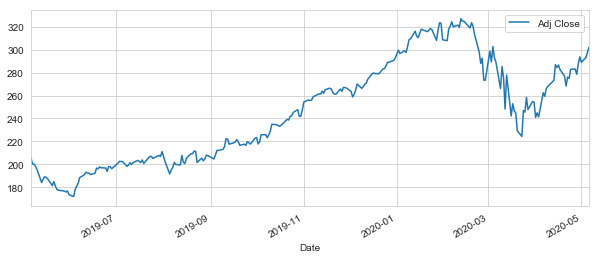

In [10]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

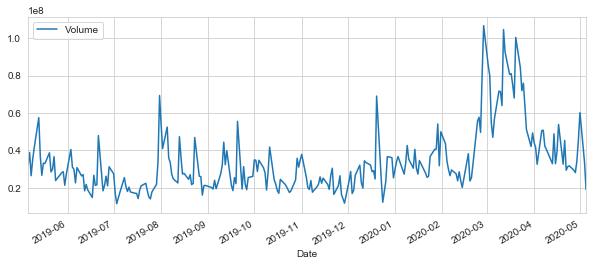

In [28]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

# stocks traded

In [13]:
ma_days = [10, 20, 50] # Moving Average

for ma in ma_days:
    column_name = 'MA for {} days'.format(ma)
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

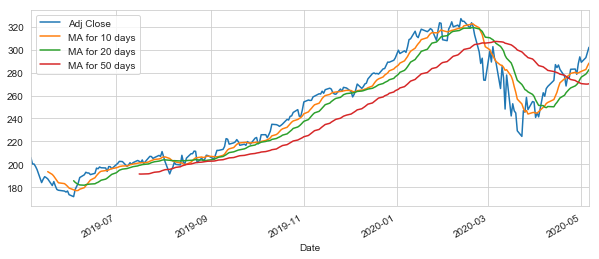

In [20]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False, figsize=(10,4))

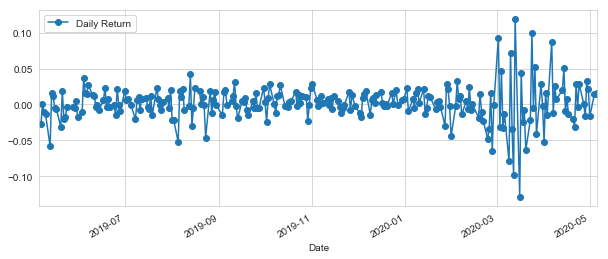

In [30]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(legend=True, figsize=(10,4), linestyle='-', marker='o')

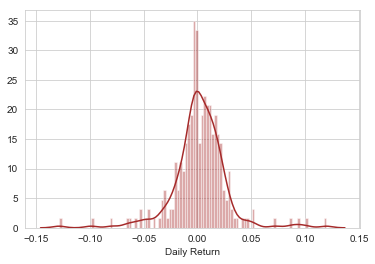

In [40]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='brown')

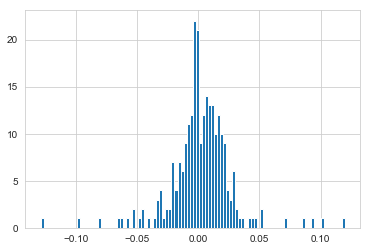

In [41]:
AAPL['Daily Return'].hist(bins=100)

In [42]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [45]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-05-06,205.786469,1950.550049,1189.390015,126.476624
2019-05-07,200.239075,1921.000000,1174.099976,123.880966
2019-05-08,200.278534,1917.770020,1166.270020,123.871117
2019-05-09,198.126709,1899.869995,1162.380005,123.861244
2019-05-10,195.381973,1889.979980,1164.270020,125.469955


In [46]:
tech_return = closing_df.pct_change()

In [48]:
tech_return.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-05-06,NaN,NaN,NaN,NaN
2019-05-07,-0.026957,-0.015150,-0.012855,-0.020523
2019-05-08,0.000197,-0.001681,-0.006669,-0.000080
2019-05-09,-0.010744,-0.009334,-0.003335,-0.000080
2019-05-10,-0.013853,-0.005206,0.001626,0.012988


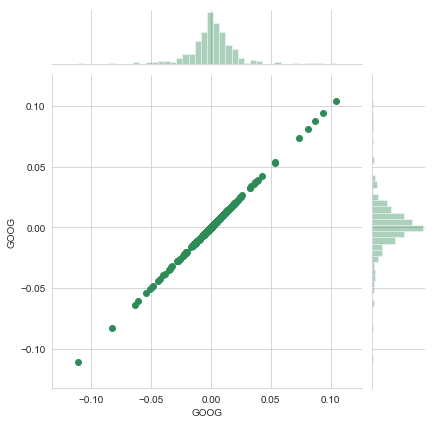

In [49]:
sns.jointplot('GOOG','GOOG', tech_return, kind='scatter', color='seagreen')

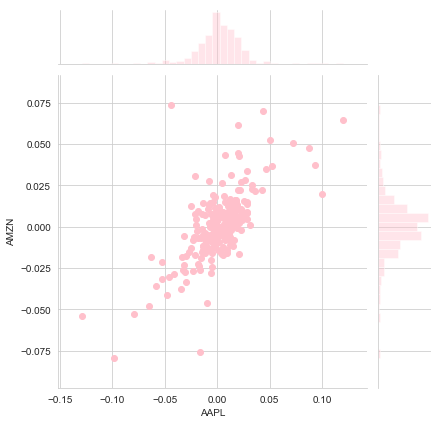

In [54]:
sns.jointplot('AAPL', 'AMZN', tech_return, kind='scatter', color='pink')

In [57]:
#Pearson product-moment correlation coefficient 